In [1]:
import pandas as pd
import numpy as np
# Initialization
import nltk 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm
nltk.download('wordnet')
nltk.download('omw-1.4')
from cleanup_functions import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from nltk.stem.wordnet import WordNetLemmatizer
WNlemma = nltk.WordNetLemmatizer()
stemmer = nltk.PorterStemmer()
from nltk.tokenize import TweetTokenizer


[nltk_data] Downloading package wordnet to /Users/kw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kw/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [23]:
# data
INPUT_NAME='train_wikipedia'
#INPUT_NAME='train_civil'

df=pd.read_csv("../data/"+INPUT_NAME+ ".csv")
df = df.reset_index(drop=True)

In [24]:
df.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Get list of toxic words

In [13]:
#X = train.loc[train['toxic'] == 1, 'comment_text'] 
X = df['comment_text'] 
Y = df['toxic']
X  = X.apply(lambda x: x.encode("latin-1","ignore").decode('ISO-8859-1'))

# numbers
X  = X.apply(lambda x: x.encode("ascii","ignore").decode('ISO-8859-1'))
X = X.apply(lambda x: re.sub(r'[0-9]+', '', x))

# Stock market tickers $GE
X = X .apply(lambda x: re.sub(r'\$\w*', '', x))

# remove hashtags
X  = X.apply(lambda x: re.sub(r'#', '', x))
import nltk
WNlemma = nltk.WordNetLemmatizer()
stemmer = nltk.PorterStemmer()

def tweettokenizer(text):
    tt = TweetTokenizer(preserve_case=True, strip_handles=True,
                            reduce_len=True)
    return tt.tokenize(text)
    
def nlp_preprocess(X, tokenizer, vectorizer, word_generalization, min_df=1, stop_words={}, ngram=1, lowercase=True):
    # Fit the CountVectorizer to the training data
    print('Vectorizing and Tokenizing...')
    analyzer = vectorizer(min_df=min_df, 
                            ngram_range=(1,ngram), stop_words=stop_words, 
                            tokenizer=tokenizer, 
                            lowercase=lowercase).build_analyzer()
    def change_word(doc):
        return (word_generalization(t) for t in analyzer(doc))
    vect = vectorizer(analyzer=change_word)
    X_vect = vect.fit_transform(X)
    print('Done!')
    return X_vect, vect

0         Explanation Why the edits made under my userna...
1         Daww He matches this background colour I am se...
2         Hey man I am really not trying to edit war It ...
3          More I cannot make any real suggestions on im...
4         You sir are my hero Any chance you remember wh...
                                ...                        
223529    Jerome I see you never got around to this Im n...
223530    Lucky bastard Heh you are famous now I kida en...
223531    shame on you all You want to speak about gays ...
223532    MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...
223533      Unicorn lair discovery  Supposedly a unicorn...
Name: comment_text, Length: 223534, dtype: object

In [16]:
#########################################
# set parameters
#########################################
min_df = 20 # 1 20
stop_words = 'english' # {} 'english'
ngram = 1 # 1, 2
lowercase = True # True, False
tokenizer = tweettokenizer
vectorizer = CountVectorizer # TfidfVectorizer CountVectorizer
word_generalization = WNlemma.lemmatize # stemmer.stem WNlemma.lemmatize

#########################################
# preprocess and fit models
#########################################


# preprocess
X_vect , vect= nlp_preprocess(X, tokenizer, vectorizer, word_generalization, min_df, stop_words, ngram, lowercase)
print(X_vect)

Vectorizing and Tokenizing...
Done!
  (0, 77118)	1
  (0, 69127)	1
  (0, 250600)	1
  (0, 98533)	1
  (0, 145223)	1
  (0, 78810)	1
  (0, 196434)	1
  (0, 252906)	1
  (0, 121591)	1
  (0, 42973)	1
  (0, 89009)	1
  (0, 256621)	1
  (0, 157230)	1
  (0, 271578)	1
  (0, 64472)	1
  (0, 77848)	1
  (0, 194224)	1
  (0, 233375)	1
  (0, 227745)	1
  (0, 169902)	1
  (0, 196093)	1
  (1, 227745)	1
  (1, 55101)	1
  (1, 141418)	1
  (1, 18994)	1
  :	:
  (223532, 49944)	1
  (223532, 15819)	1
  (223532, 25121)	1
  (223532, 26008)	1
  (223532, 151213)	1
  (223532, 91337)	1
  (223532, 143906)	1
  (223532, 210213)	1
  (223532, 32920)	1
  (223533, 188328)	1
  (223533, 127203)	1
  (223533, 2378)	1
  (223533, 161415)	1
  (223533, 15940)	1
  (223533, 113374)	1
  (223533, 125390)	1
  (223533, 62276)	1
  (223533, 225045)	3
  (223533, 62282)	1
  (223533, 246908)	3
  (223533, 92908)	1
  (223533, 198668)	1
  (223533, 187179)	1
  (223533, 129339)	3
  (223533, 64741)	1


In [18]:
X_vect.shape

(223534, 274038)

In [29]:
len(vect.vocabulary_)


274038

In [6]:
# Train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1500)
model.fit(X_vect, Y)


LogisticRegression(max_iter=1500)

In [17]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model (from lowest to highest values)
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1]
# so the list returned is in order of largest to smallest
print("Largest Coefs: \n{}".format(feature_names[sorted_coef_index[:-300:-1]]))

/Users/kw/neuefische/detoxifying-my-social-media/.venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: index 309695 is out of bounds for axis 0 with size 274038

In [8]:
toxic_words_raw = feature_names[sorted_coef_index[:-300:-1]]

In [4]:
# list of badwords
#toxic_words = ['bitch', 'fuck', 'shit', 'piss', 'dick', 'motherfucker', 'ass', 
#'asshole', 'bastard', 'damn', 'cunt', 'faggot', 'slut', 'whore']
# not in: 'meathead','douche-bag'

In [8]:
# function to get word from index
def get_term(dict, search_index):
    return list(dict.keys())[list(dict.values()).index(search_index)]
print(get_term(vect.vocabulary_, 36776))

# get index
def get_word_index(dict, word):
    return dict[word]
print(get_word_index(vect.vocabulary_, 'bitch'))

bwtter
30581


# Lemmatization

In [25]:

WNlemma = nltk.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()
# analyzer = TfidfVectorizer(min_df=15).build_analyzer()

def lemmatize_word(doc):
    return (WNlemma.lemmatize(t) for t in analyzer(doc))

lemm_vectorizer = CountVectorizer(min_df=15, analyzer=lemmatize_word)
#lemm_vectorizer = TfidfVectorizer(min_df=15, analyzer=lemmatize_word)

# Transform X_train
X_train_lemm_vectorized = lemm_vectorizer.fit_transform(df['comment_text'])

In [26]:
lemm_vectorizer.vocabulary_

{'explanation': 6591,
 'why': 18818,
 'the': 17154,
 'edits': 5922,
 'made': 10503,
 'under': 17881,
 'my': 11464,
 'username': 18184,
 'hardcore': 8086,
 'metallica': 10950,
 'fan': 6762,
 'were': 18737,
 'reverted': 14610,
 'they': 17202,
 'weren': 18738,
 'vandalism': 18262,
 'just': 9687,
 'closure': 3583,
 'on': 12140,
 'some': 15978,
 'gas': 7519,
 'after': 970,
 'voted': 18514,
 'at': 1758,
 'new': 11680,
 'york': 19185,
 'doll': 5597,
 'fac': 6679,
 'and': 1291,
 'please': 12999,
 'don': 5618,
 'remove': 14327,
 'template': 17050,
 'from': 7345,
 'talk': 16911,
 'page': 12446,
 'since': 15679,
 'retired': 14565,
 'now': 11898,
 '89': 569,
 '205': 346,
 '38': 469,
 '27': 420,
 'aww': 1925,
 'he': 8172,
 'match': 10749,
 'this': 17223,
 'background': 1965,
 'colour': 3722,
 'seemingly': 15277,
 'stuck': 16495,
 'with': 18967,
 'thanks': 17145,
 '21': 354,
 '51': 507,
 'january': 9503,
 '11': 35,
 '2016': 342,
 'utc': 18203,
 'hey': 8299,
 'man': 10590,
 'really': 13979,
 'not': 1

In [28]:
X_train_lemm_vectorized.shape

(223549, 19377)

In [19]:
# how to get index in df with specific word
X_array = X_vect.toarray()


Error: Canceled future for execute_request message before replies were done

In [60]:
X_array.shape

(223542, 19098)

In [61]:
# transpose X_array
df_occurrence = pd.DataFrame(data=X_array,columns = lemm_vectorizer.get_feature_names_out())
df_occurrence

,00,001,004,007,01,02,03,04,05,06,...,zone,zoo,zoological,zoom,zora,zoroastrian,zu,zulu,zurich,über
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
words_in_corpus = lemm_vectorizer.get_feature_names_out()
words_in_corpus

array(['00', '000', '000000', ..., '見学', '迷惑', '連絡'], dtype=object)

In [48]:
#toxic_words = toxic_words[[curse_word in words_in_corpus for curse_word in toxic_words]]
toxic_words = ['bitch', 'fuck', 'shit', 'piss', 'dick', 'motherfucker', 'ass', 
'asshole', 'bastard', 'damn', 'cunt', 'faggot', 'slut', 'whore']
# not in: 'meathead','douche-bag'
#toxic_words[

toxic_index = [i for i, curse_word in enumerate(toxic_words) if curse_word in words_in_corpus]
toxic_words = [toxic_words[i] for i in toxic_index]
toxic_words

['bitch',
 'fuck',
 'shit',
 'piss',
 'dick',
 'motherfucker',
 'ass',
 'asshole',
 'bastard',
 'damn',
 'cunt',
 'faggot',
 'slut',
 'whore']

In [63]:
# check if toxic words are in 
[curse_word in words_in_corpus for curse_word in toxic_words]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [65]:
df_occurrence['bitch'] + df_occurrence['slut'] 

0         0
1         0
2         0
3         0
4         0
         ..
223537    0
223538    0
223539    0
223540    1
223541    0
Length: 223542, dtype: int64

In [67]:
index_toxic = sum(df_occurrence[insult] for insult in toxic_words) > 0

In [68]:
df['toxic_baseline'] = index_toxic

In [69]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'toxic_baseline'],
      dtype='object')

In [71]:
import matplotlib.pyplot as plt
# important functions
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

def print_evaluations(y,predictions):
    print(f"Accuracy: {accuracy_score(y, predictions)}")
    print(f"Precision: {precision_score(y, predictions)}")
    print(f"Recall: {recall_score(y, predictions)}")
    print(f"F1: {f1_score(y, predictions)}")

In [75]:
print_evaluations(df['toxic'],df['toxic_baseline'])

Accuracy: 0.927530396972381
Precision: 0.7485615650172612
Recall: 0.36503928170594835
F1: 0.4907582044511504


Confusion matrix, without normalization
[[199536   2622]
 [ 13578   7806]]


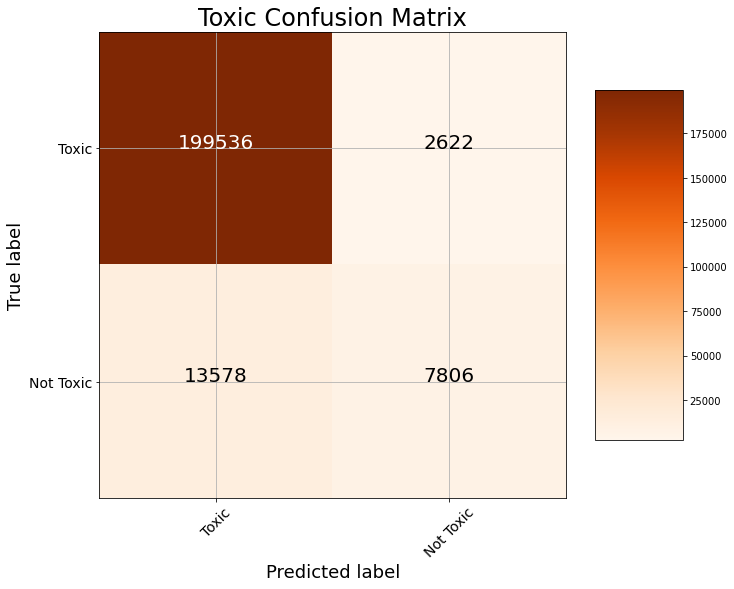

In [77]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(df['toxic'],df['toxic_baseline'])

plot_confusion_matrix(cm, classes = ['Toxic', 'Not Toxic'],
                      title = 'Toxic Confusion Matrix')

In [49]:
#%%
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
# Initialization
import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

import mlflow
WNlemma = nltk.WordNetLemmatizer()


def __get_data():
    #logger.info("Getting the data")
    #########################################
    # import data
    #########################################
    DATA_NAME = 'train_wikipedia_pre_clean'
    train = pd.read_csv("../data/" + DATA_NAME + ".csv")

    # cleaning data and preparing
    Y = train["toxic"][:100000]
    X = train["comment_text"][:100000]
    return X,Y, DATA_NAME



X, Y,DATA_NAME = __get_data()





analyzer = CountVectorizer().build_analyzer()
def lemmatize_word(doc):
    return (WNlemma.lemmatize(t) for t in analyzer(doc))

lemm_vectorizer = CountVectorizer(min_df=15, analyzer=lemmatize_word)
X_vect = lemm_vectorizer.fit_transform(X)
lenvoc =  len(lemm_vectorizer.vocabulary_)


# get toxic words

model = LogisticRegression(max_iter=1500)
model.fit(X_vect, Y)
# get the feature names as numpy array
feature_names = np.array(lemm_vectorizer.get_feature_names_out())
# Sort the coefficients from the model (from lowest to highest values)
sorted_coef_index = model.coef_[0].argsort()
toxic_words_raw = feature_names[sorted_coef_index[:-300:-1]]


[nltk_data] Downloading package wordnet to /Users/kw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kw/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [54]:

X_array = X_vect.toarray()
df_occurrence = pd.DataFrame(data=X_array,columns = lemm_vectorizer.get_feature_names_out())
    
#words_in_corpus = lemm_vectorizer.get_feature_names_out()
## only keep those words that are in corpus
#toxic_index = [i for i, curse_word in enumerate(toxic_words) if curse_word in words_in_corpus]
#toxic_words = [toxic_words[i] for i in toxic_index]

#logger.info('Calculating Score')
pred = sum(df_occurrence[insult] for insult in toxic_words_raw) > 0
eval = roc_auc_score(Y, pred)






In [55]:
df['pred'] = pred

In [60]:
df['pred'] == 1 & df['toxic'] == 0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [58]:
falsealarm_baseline = df.loc[(df['pred'] == 1& df['toxic'] == 0), 'comment_text']
#falsealarm_baseline.to_csv('falsealarm_baseline.csv')
#misses_baseline = df.loc[(df['pred'] == 0 & df['toxic'] == 1), 'comment_text']
#misses_baseline.to_csv('misses_baseline.csv')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().